# Exploratory Data Analysis (EDA) for Job Postings Dataset

This notebook performs an initial exploration of the job postings dataset. The goal is to understand the structure of the data, identify missing values, and uncover patterns or trends.

In [46]:
# Importing Libraries
from datasets import load_dataset
import matplotlib as plt
import seaborn as sns
import pandas as pd
import ast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Data
# The dataset is loaded from Hugging Face's `datasets` library.
df = load_dataset('lukebarousse/data_jobs', split='train').to_pandas()

# Save the raw data
# Save the dataset to a CSV file for future use.
df.to_csv('C:/Users/DELL/Job-Postings-Analysis/data/raw_data.csv', index=False)



## 1. Data Loading and Initial Inspection
we load the dataset and perform an initial inspection to understand its structure.

In [41]:

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Check the shape of the dataset
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())


First 5 rows of the dataset:


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."



Shape of the dataset (rows, columns):
(785741, 17)

Data types of each column:
job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

Missing values in each column:
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance     

## 2. Basic Summary Statistics

In [42]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
display(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
display(df.describe(include='object'))

Summary statistics for numerical columns:


,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000



Summary statistics for categorical columns:


,job_title_short,job_title,job_location,job_via,job_schedule_type,search_location,job_posted_date,job_country,salary_rate,company_name,job_skills,job_type_skills
count,785741,785740,784696,785733,773074,785741,785741,785692,33067,785723,668704,668704
unique,10,234673,17217,7903,47,173,607192,160,5,139982,177562,177562
top,Data Analyst,Data Engineer,Anywhere,via LinkedIn,Full-time,India,2023-08-24 11:35:33,United States,year,Emprego,['excel'],{'analyst_tools': ['excel']}
freq,196075,53908,69552,186679,701727,51088,10,206292,22004,6664,13238,13238


## 3 Unique Values

In [43]:
# Check unique values in 'job_title_short'
print("Unique job titles:")
print(df['job_title_short'].unique())

# Check unique values in 'job_country'
print("\nUnique countries:")
print(df['job_country'].unique())

Unique job titles:
['Senior Data Engineer' 'Data Analyst' 'Data Engineer' 'Business Analyst'
 'Data Scientist' 'Machine Learning Engineer' 'Senior Data Analyst'
 'Cloud Engineer' 'Senior Data Scientist' 'Software Engineer']

Unique countries:
['United States' 'Mexico' 'Germany' 'Sudan' 'Romania' 'Denmark'
 'Switzerland' 'France' 'Brazil' 'United Kingdom' 'India' 'Poland'
 'Belgium' 'Russia' 'Serbia' 'Singapore' 'Costa Rica' 'Ireland' 'Italy'
 'Malaysia' 'Canada' 'Uruguay' 'Namibia' 'Estonia' 'Israel' 'Hungary'
 'Austria' 'Philippines' 'Egypt' 'Australia' 'Chile' 'Spain' 'Netherlands'
 'South Africa' 'Colombia' 'Hong Kong' 'Kuwait' 'Finland' 'Luxembourg'
 'China' 'Puerto Rico' 'Sweden' 'Saudi Arabia' 'Argentina' 'Turkey'
 'Panama' 'Nigeria' 'New Zealand' 'Ukraine' 'Jordan'
 'United Arab Emirates' 'Armenia' 'Pakistan' 'Lesotho' 'Mauritius'
 'Portugal' 'Bahrain' 'Taiwan' "Côte d'Ivoire" 'U.S. Virgin Islands'
 'Réunion' 'Kazakhstan' 'Lithuania' 'Moldova' 'Belarus' 'Cyprus'
 'Bulgaria' 'Hon

## 4.Basic Visualizations

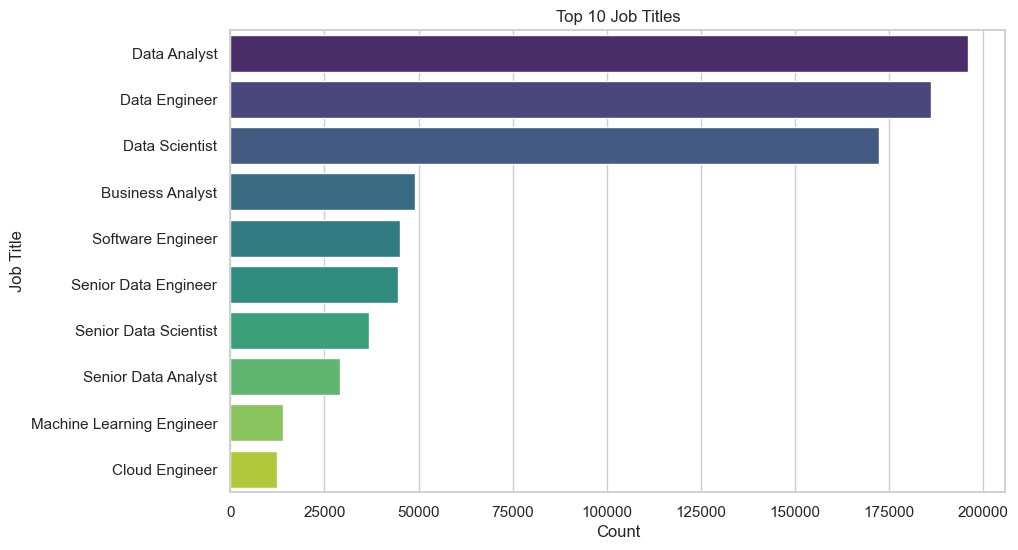

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualizations
sns.set(style="whitegrid")

# Plot the distribution of job titles (top 10)
plt.figure(figsize=(10, 6))
top_job_titles = df['job_title_short'].value_counts().head(10)
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

## Summary of Findings

- The dataset contains **785741** rows and **17** columns.
- The most common Role is **Data Analyst**.
- The most common job location is **Anywhere**
- The most common Job Posted Via is **LinkedIn**
- The most common Job skill is **Excel**